# Homework 4: Compartmental Models + Data Visualization


## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Sunday, November 24, 2024** 

It should be uploaded into D2L Homework #4.  Submission instructions can be found at the end of the notebook.

## <p style="text-align: right;"> &#9989; Put your name here</p>

---

## Part 0. Academic integrity statement (2 points)

In the markdown cell below, paste your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.

<font size=6 color="#009600">&#9998;</font> *Put your personal academic integrity statement here.*

---
<a id = "part_1"></a>
## Part 1. Understanding compartmental models (26 total points)



### **Background**

The movement of pollutants through different stages in the environment can be modeled using compartments. 

Initially, pollutants are released as emissions ($E$). Over time, these emissions decrease as they transition into the atmosphere ($A$). Once in the atmosphere, pollutants build up but are simultaneously reduced through two processes: some pollutants settle out of the air and deposit on surfaces ($D$), while others are naturally cleaned by environmental elements such as trees and plants (Untracked). Eventually, the pollutants that settle out contribute to a buildup of deposited pollutants on the ground or water. The balance of how quickly pollutants are emitted, how they accumulate in the atmosphere, and how they are removed by natural processes and deposition determines the overall distribution and movement of pollution through these stages.

We can sketch out a compartmental model for this system with flux parameters $k_1$, $k_2$, and $k_3$ as shown below:

<img src="https://i.postimg.cc/nVNWzDMy/Screenshot-2024-11-06-at-09-19-45.png" alt="EAD model" width="500"/>

You will need to conceptually analyze this model and write down the model as ordinary differential equations (ODEs).

### &#9989;&nbsp; **Part 1.1 (5 points)**

Describe in the cell below: how many compartments there are in the model, and what each of the compartments stands for. 

<font size=6 color="#009600">&#9998;</font> *Put your answer here*

### &#9989;&nbsp; **Part 1.2 (9 points)**

Describe in the cell below the interpretation of each of the following parameters
- $k_1$
- $k_2$
- $k_3$

in terms of **what rate it represents** and **which part of the polluting process** it describes.

<font size=6 color="#009600">&#9998;</font> *Put your answer here*

### &#9989;&nbsp; **Part 1.3 (6 points)**

Answer in the cell below: Which of the following parameters $k_1$, $k_2$, or $k_3$ should we attempt to control in order to mitigate pollution? Should that parameter be large or small? Why?

<font size=6 color="#009600">&#9998;</font> *Put your answer here*

### &#9989;&nbsp; **Part 1.4 (6 points)**

In the cell below, write down the ordinary differential equations associated with this compartmental model.


<font size=6 color="#009600">&#9998;</font> *Put your answer here*

---
<a id="part_2"></a>
## Part 2. Solving differential equations numerically (26 total points)

### **Background**

In previous assignments, you have used `solve_ivp` to compute the numeric solution of the logistic model of the growth of a single population. Recall, the Logistic population model is described by the following differential equations:

\begin{equation}
\frac{dP}{dt} = kP\Big(1-\frac{P}{C}\Big),
\end{equation}

where $P =$ population, $k =$ growth rate, and $C =$ the carrying capacity. 

Example code for computing the solution for for $P_0 =0.1$ billion (initial population), $k=1$, and $C =1$ billion is provided below:

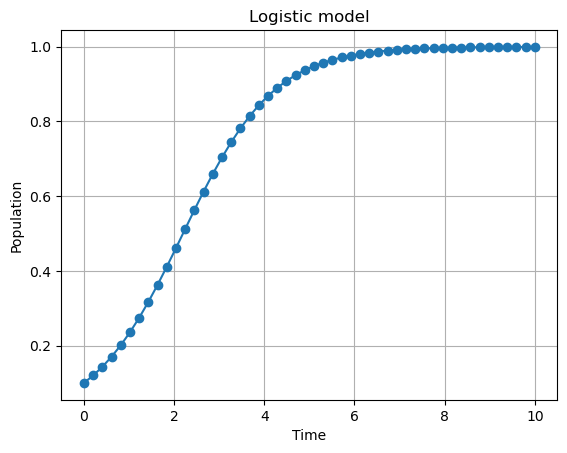

In [2]:
# example code to compute a numeric solution of the logistic model
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# define the derivative
def logistic(time, current_state):
    p = current_state   
    dpdt = p*(1-p)    
    return dpdt

# compute numeric solution
initial_p = [0.1]
time = np.linspace(0,10,50)

result = solve_ivp(logistic, (0,20), initial_p, t_eval = time)

# unpack solution
numerical_p = result.y[0,:]

fig = plt.figure()
plt.plot(time, numerical_p, 'o-')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic model')
plt.grid()
plt.show()

Now you wonder: what happens if there are two different species competing for the same resources? (Such as the great white sharks and the seven-gill sharks &#x1F609;) How would the population growth of one species interfere with that of the other? 

Luckily, such models already exist. One of them is a generalization of the logistic model to take into account resource competition between two species $u$ and $v$ and we have the following competitive Lotka-Volterra model:

$$ \frac{du}{dt} = r_1u(1-(\frac{u +a_{12} v}{K_1}))$$
$$ \frac{dv}{dt} = r_2v(1 -(\frac{v + a_{21}u}{K_2})).$$


Here, $a_{12}$ represents the competitive effect species $v$ has on the population of species $u$ and $a_{21}$ represents the competitive effect species u has on the population of species v. These values do not have to be equal. Because this is the competitive version of the model, all interactions must be harmful (competition) and therefore all a-values are positive.

#### Foxes and Coyotes

Let's apply this model to two competitive predators, Red Foxes and Coyotes. Coyotes will kill foxes to stop them from hunting in their territory. Here's [an article from Smithsonian magazine](https://www.smithsonianmag.com/science-nature/foxes-and-coyotes-are-natural-enemies-or-are-they-180968424/) that describes how that is not happening in urban areas. 

To make our model, we first rescale the equations and replace the variables with Foxes (`F`) and Coyotes (`C`) for the populations of the two species.


After rescaling, the **two species competitive Lotka-Volterra model** can become a simplified model:
\begin{align}
\frac{dF}{dt} &= F(1-F -\alpha C)  &(1)\\
\frac{dC}{dt} &= rC(1 -C-\beta F). &(2)
\end{align}

We say that the competition for the foxes `F` (resp. for the coyotes `C`) is **strong** if $\alpha > 1$ (resp. $\beta > 1$). We say that the competition for the foxes `F` (resp. for the coyotes `C`) is **weak** if $0 < \alpha < 1$ (resp. $0 < \beta< 1$).

*NOTE:** In these rescaled equations, the relationship between `F` and `C` is proportional. So if we set `F=1` and `C=0.5`, then there are twice as many foxes as coyotes in our model to start.

**Your job for this part of the assignment is implementing and computing the numeric solutions for the two species competitive Lotka-Volterra model as described by equations 1 and 2 above. You can do so by adapting the code for the logistic model above.**

### &#9989;&nbsp; **Part 2.1 (8 points)**  
Define the derivative function for the two species competitive Lotka-Volterra model in the cell below (to be used as an input later for `solve_ivp` -- so pay attention to the format).

In [3]:
# write your function here


### &#9989;&nbsp; **Part 2.2 (6 points)**

Using `solve_ivp`, compute the numeric solution for two species competitive Lotka-Volterra model with the parameters $r=1$, $\alpha=2/3,$ $\beta =1/4$, the initial conditions $[F_0,C_0]= [1,.5]$, and the final time equal 20. Unpack the result you get from `solve_ivp` into separate variables `F` and `C`.

In [75]:
# put your code here


### &#9989;&nbsp; **Part 2.3 (4 points)**

Plot the solutions of $F$ and $C$ as a function of time in the cell below. Be sure to add appropriate axis labels and legends. 

In [86]:
# put our code here


### &#9989;&nbsp; **Part 2.4 (2 points)**

When $0 < \alpha <1 $ and $ 0 <\beta <1$, the model is a "weak" competitive Lotka-Volterra model. Check with the plot above to see what will happen as time goes on. What happens to the populations of foxes and coyotes?

<font size=6 color="#009600">&#9998;</font> *Put your answer here*

### &#9989;&nbsp; **Part 2.5 (6 points)**

When $\alpha > 1 $ and $\beta > 1$, the model is a "strong" competitive Lotka-Volterra model. Using the values for $\alpha$ and $\beta$ given below, run your model again and make a new plot like the one above to see what happens to the populations.

Choose `r=1`, `alpha=1.6`, and `beta=1.1`. What happens to the populations of foxes and coyotes?

In [ ]:
## put your code here

<font size=6 color="#009600">&#9998;</font> *Put your answer here*

---
<a id = "part_3"></a>
## Part 3. Interpreting Results from a Compartmental Model (15 total points)



In part 2, we used `solve_ivp` to solve two differential equations. Now, we will use this technique to solve a differential system and interprete results.

### **Background**: 

The SIR epidemic model is one of the simplest compartmental models, and many models are derivatives of this [**basic form**](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology). 

The model consists of three compartments: the number of susceptible individuals (S), the number of infectious individuals (I), and the number of removed (and immune) or deceased individuals (R). 

When we account for the vaccination impacts on the model, we have the following SIRVI model:
$$ \frac{dS}{dt} = -\beta SI -\mu S, $$
$$ \frac{dI}{dt} = \beta SI +\alpha VI -\gamma I, $$
$$ \frac{dV}{dt} = \mu S -\alpha VI, $$
$$ \frac{dR}{dt} = \gamma I ,$$

where $V$ is the number of vaccinated individuals, the parameters $\beta$ represents the infectious rate of susceptibles, $\gamma$ is the recovery rate, $\mu$ is the vaccine rate of susceptibles, and $\alpha$ is the infectious rate of vaccinated. We assume will use day as our unit of time, $t$. This means that, for example,$t=2$ would be 2 days.

Assuming the parameters $\alpha =0.2, \beta =0.01, \gamma = 0.5$, and $\mu = 0.4$ with the following initial conditions:

* $S(0) = 130$
* $I(0) = 40$
* $V(0) = 50$
* $R(0) = 0$
  
Evolve the model for 15 days using a timestep of $\Delta t = 0.01$ days. In the following, the code has been provided and when you run this code, you will obtain the following plot. In the following you need to inteprate results based on your observations. 
<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/0add73613de0ff5e3d8027806d8a09b52fd18505/Homework/numerical.png?raw=true" alt="numerical"/>





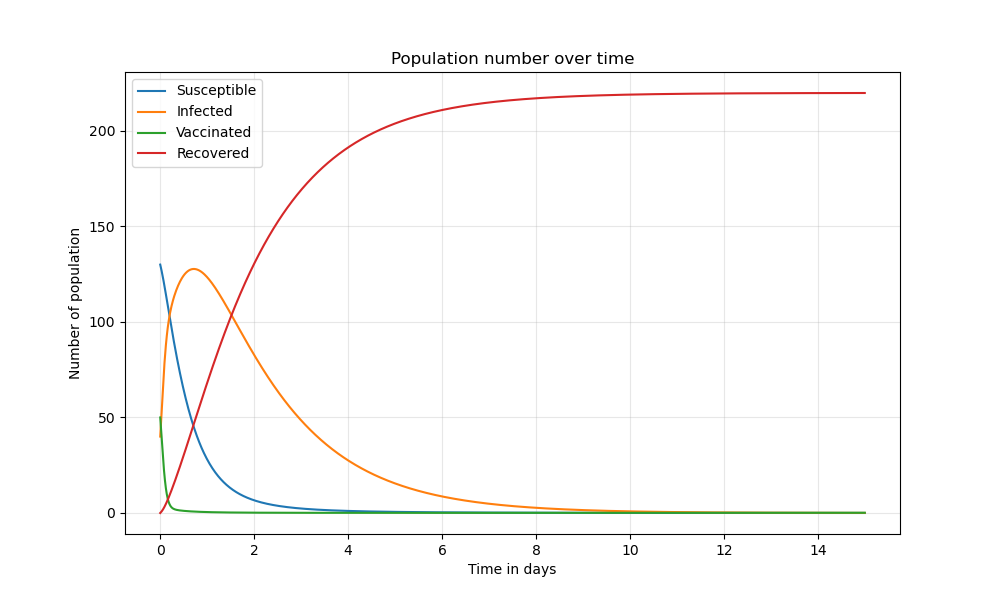

In [3]:
# put your code here
##### The import commands you need are provided here
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Step 1. Define the Derivative Function
def derivatives(t, y):
    S, I, V, R = y # 
    a = 0.2 
    b = 0.01 
    g = 0.6 
    m = 0.4 
    
    dSdt = -(b * S * I) - (m * S) 
    dIdt = (b * S * I) + (a * V * I) - (g * I) 
    dVdt = (m * S) - (a * V * I) 
    dRdt = (g * I) 

    return [dSdt, dIdt, dVdt, dRdt] 

In [43]:
# Step 2. Given the Initial Conditions
S0 = 130  
I0 = 40 
V0 = 50  
R0 = 0 

initial_conditions = [S0, I0, V0, R0] 

In [44]:
#Step 3. The time range for the system and time steps
tinit = 0 
tmax = 15
time_step = .01

# Generate an array of times using np.arange()
times = np.arange(tinit, tmax, time_step)

In [45]:
#Step 4. Calling solv_ivp Function
sol = solve_ivp(derivatives, (0,times[-1]), initial_conditions, t_eval = times)

In [46]:
#Step 5. Unpack the Numerical Solutions

t_result = sol.t 

numerical_S = sol.y[0,:] 
numerical_I = sol.y[1,:] 
numerical_V = sol.y[2,:] 
numerical_R = sol.y[3,:] 

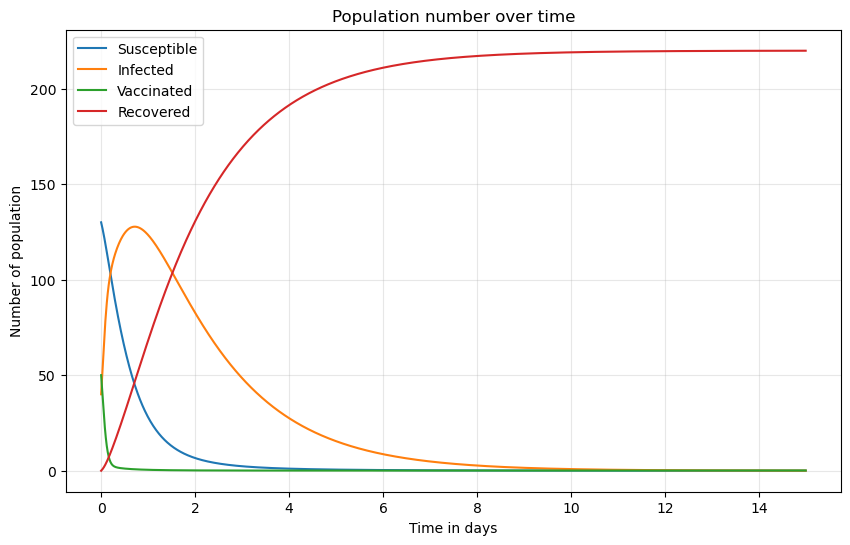

In [47]:
#Step 6. Plots of Each Component
plt.figure(figsize=(10, 6))
plt.plot(t_result, numerical_S, label='Susceptible')
plt.plot(t_result, numerical_I, label='Infected')
plt.plot(t_result, numerical_V, label='Vaccinated')
plt.plot(t_result, numerical_R, label='Recovered')

plt.title('Population number over time')
plt.xlabel('Time in days')
plt.ylabel('Number of population')
plt.legend()
plt.grid(True, alpha = 0.3)
#plt.show()

#plt.savefig("numerical.png")

### &#9989;&nbsp; **Part 3.1 (9 points)** 
Based on the plot, answer the following questions:
1. Which categories of people are likely to increase and which categories are likely to decrease in the initial stage?(3 points)
2. The number of infected individuals will decrease after a certain period. What is the most likely reason for this? (3 points)
3. When is the best time to administer vaccinations?(3 points)

In [ ]:
#Put your answer here

### &#9989;&nbsp; **Part 3.2 (6 points)** 
Assuming we only change the parameter $\alpha =0$ which means vaccinated people will not get infected.

After running the code provided above, you will obtain the following plot.

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/0add73613de0ff5e3d8027806d8a09b52fd18505/Homework/numerical2.png?raw=true" alt="numerical2"/>

Based on the plots provided above, answer the following questions.
1. Do you think vaccination is a good strategy for controlling the spread of infectious diseases? (3 points)
2. Do recovered individuals need to get vaccinated in this scenario? (3 points)

In [ ]:
#Put your answer here

---
<a id="part_4"></a>
## Part 4. Data Visualization (16 total points)

### **Background**

In this section you will gain practice using some data to make a plot that allows you to answer a question. 

The dataset [(source!)](https://archive.ics.uci.edu/dataset/10/automobile) that you will use has data about different types of cars.  The dataset was compiled in 1987 using data from 1985, so the data is surely a little dated!  However, it is still a good dataset to use to explore quality data visualization.  

The dataset has the following columns:

Column 1 is a rating about how "risky" it is to insure the car.  -3 is not very risky, while 3 is very risky.
Column 2 is a measurement representing the average losses associated with a car in a year.  This is how much an insurance company would have to pay.  This measurement is normalized based on type of vehicle.
  1. `symboling`:                -3, -2, -1, 0, 1, 2, 3.
  2. `normalized-losses`:        continuous from 65 to 256.

Columns 3-9 contain general info

  3. `make`:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. `fuel-type`:                diesel or gas.
  5. `aspiration`:               std, turbo.
  6. `num-of-doors`:             four, two.
  7. `body-style`:               hardtop, wagon, sedan, hatchback, convertible.
  8. `drive-wheels`:             4wd, fwd, rwd.
  9. `engine-location`:          front, rear.

Columns 10-14 contain info about the size of the vehicle
    
 10. `wheel-base`:               continuous from 86.6 120.9.
 11. `length`:                   continuous from 141.1 to 208.1.
 12. `width`:                    continuous from 60.3 to 72.3.
 13. `height`:                   continuous from 47.8 to 59.8.
 14. `curb-weight`:              continuous from 1488 to 4066.

Columns 15-23 contain info about the engine

 15. `engine-type`:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. `num-of-cylinders`:         eight, five, four, six, three, twelve, two.
 17. `engine-size`:              continuous from 61 to 326.
 18. `fuel-system`:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. `bore`:                     continuous from 2.54 to 3.94.
 20. `stroke`:                   continuous from 2.07 to 4.17.
 21. `compression-ratio`:        continuous from 7 to 23.
 22. `horsepower`:               continuous from 48 to 288.
 23. `peak-rpm`:                 continuous from 4150 to 6600.

Columns 24-26 contain info about fuel economy and price
    
 24. `city-mpg`:                 continuous from 13 to 49.
 25. `highway-mpg`:              continuous from 16 to 54.
 26. `price`:                    continuous from 5118 to 45400.

### &#9989;&nbsp; **Part 4.1 (2 points)** Load the data

We have taken the original dataset and cleaned out the missing values for you.  The cleaned dataset is called `auto.csv`.  Load this file in `pandas`.  Display the first 5 rows to make sure the data loaded correctly!

In [14]:
# put your code here



### &#9989;&nbsp; **Part 4.2 (4 points)** Choosing a question and getting the data

This dataset has a lot of information!  Let's make some visualizations to gain some insights.  

Recall the key pieces to an effective data visualization (from the Day 20 Pre Class and In Class assignments). There are many visualizations you could make from this data. Potential questions that can be answered with the data are listed below. 

**RQ 1:** Is the size of a vehicle related to fuel economy?

**RQ 2:** Is fuel economy correlated to fuel type?

**RQ 3:** How does the size of the vehicle relate to price?

**RQ 4:** Or, you can choose your own question!

In the cell(s) below, **indicate which question you are going to explore and which variables in the data you will use to answer your question**.  You should choose at least three variables!


<font size=6 color="#009600">&#9998;</font> *Write down the question you will answer and the variables you will use.*

### &#9989;&nbsp; **Part 4.3 (8 points)** Making a Plot

Now that you have chosen what data you will use, it's time to create a plot! Using the plotting tools you have explored (i.e. `matplotlib.pyplot`, `seaborn`, and/or `pandas`), create a plot that answers your question. Your plot will be graded with the rubric from Day 20:

1. **Does the plot tell a story? (4 Points)** 
2. **No wasted space (2 points)**
3. **Labels, legend, and title are informative without cluttering (1 points)**
4. **Presenting multi-variable data (1 points)**

In [20]:
# put your code here to create a plot


### &#9989;&nbsp; **Part 4.4 (2 points)** Drawing conclusions

Now, provide an answer to the question you chose. Be sure to use your plot to help justify your answer!

<font size=6 color="#009600">&#9998;</font> *Write the answer to your question here.*

<a id="part_5"></a>
## Part 5. Data Interpretation (16 total points)

In this section, you will practice using graphs to interpret the data.  The data is the same as in Part 5.


### &#9989;&nbsp; **Part 5.1 (8 points)**

Take a look at the graphs below.  They plot `make` of the vehicle against `normalized-losses` and `price`. The `symboling` is used as the color.   

*Reminder:* `normalized-losses` is a measurement for how much loss (or how much the insurance company has to pay) is associated with the car per year, on average.  `symboling` represents how risky an insurance company considers to cover each car.

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/0add73613de0ff5e3d8027806d8a09b52fd18505/Homework/auto_make_normloss.png?raw=true" alt="make norm loss"/>
<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/0add73613de0ff5e3d8027806d8a09b52fd18505/Homework/auto_make_price.png?raw=true" alt="make price"/>

Answer the following questions below:
1. Do you notice any trends about the make of the car, and how it affects the price or the normalized losses? Justify your answer using the graphs. (4 pts)
2. Do you notice any trends about how risky it is for an insurance company to cover the car? Justify your answer using the graphs. (4 pts)

<font size=6 color="#009600">&#9998;</font> *Write your answer here.*

### &#9989;&nbsp; **Part 5.2 (8 points)**

Now, take a look at the following graph.  It plots the `price` of the vehicle against `normalized-losses`.  The color is associated with the `symboling`.

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/0add73613de0ff5e3d8027806d8a09b52fd18505/Homework/auto_price_normloss.png?raw=true" alt="price norm loss"/>

Answer the following question:
1. Do you notice any trends from this graph that you did not notice before? Justify your answer (4 pts)
2. In what situations would the previous two graphs be better to use?  In what situations would the current graph be better? Justify your answer (4 pts)

<font size=6 color="#009600">&#9998;</font> *Write your answer here.*

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University